In [ ]:
pip install pycaret

In [1]:
import pandas as pd
from pycaret.regression import *

In [6]:
df=pd.read_csv('spy.csv')


,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,24.626128,24.626128,24.503610,24.608625,1003200,29,4,4,1,1993
1,1993-02-01,24.626124,24.783648,24.626124,24.783648,480500,1,0,5,2,1993
2,1993-02-02,24.766156,24.853669,24.713648,24.836166,201300,2,1,5,2,1993
3,1993-02-03,24.871164,25.116200,24.853662,25.098698,529400,3,2,5,2,1993
4,1993-02-04,25.186225,25.256235,24.906184,25.203728,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...,...
7969,2024-09-24,570.479980,571.359985,567.599976,571.299988,46805700,24,1,39,9,2024
7970,2024-09-25,571.140015,571.890015,568.909973,570.039978,38428600,25,2,39,9,2024
7971,2024-09-26,574.380005,574.710022,569.900024,572.299988,48336000,26,3,39,9,2024
7972,2024-09-27,573.390015,574.219971,570.419983,571.469971,42100900,27,4,39,9,2024


In [10]:
df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Day,int64
Weekday,int64
Week,int64
Month,int64
Year,int64


In [ ]:
#preprocess data
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)


In [14]:
df

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
Date,,,,,,,,,,
1993-01-29,24.626128,24.626128,24.503610,24.608625,1003200,29,4,4,1,1993
1993-02-01,24.626124,24.783648,24.626124,24.783648,480500,1,0,5,2,1993
1993-02-02,24.766156,24.853669,24.713648,24.836166,201300,2,1,5,2,1993
1993-02-03,24.871164,25.116200,24.853662,25.098698,529400,3,2,5,2,1993
1993-02-04,25.186225,25.256235,24.906184,25.203728,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,570.479980,571.359985,567.599976,571.299988,46805700,24,1,39,9,2024
2024-09-25,571.140015,571.890015,568.909973,570.039978,38428600,25,2,39,9,2024
2024-09-26,574.380005,574.710022,569.900024,572.299988,48336000,26,3,39,9,2024


In [19]:
df['NextClose']=df['Close'].shift(-1) #define target variable (tomorrow close price)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,NextClose
Date,,,,,,,,,,,
1993-01-29,24.626128,24.626128,24.503610,24.608625,1003200,29,4,4,1,1993,24.783648
1993-02-01,24.626124,24.783648,24.626124,24.783648,480500,1,0,5,2,1993,24.836166
1993-02-02,24.766156,24.853669,24.713648,24.836166,201300,2,1,5,2,1993,25.098698
1993-02-03,24.871164,25.116200,24.853662,25.098698,529400,3,2,5,2,1993,25.203728
1993-02-04,25.186225,25.256235,24.906184,25.203728,531500,4,3,5,2,1993,25.186205
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20,567.840027,569.309998,565.169983,568.250000,77503100,20,4,38,9,2024,569.669983
2024-09-23,569.340027,570.330017,568.099976,569.669983,44116900,23,0,39,9,2024,571.299988
2024-09-24,570.479980,571.359985,567.599976,571.299988,46805700,24,1,39,9,2024,570.039978


In [21]:
df = df.sort_values(by='Date')
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]  # First 80% for training
test_data = df.iloc[train_size:]   # Last 20% for testing

In [23]:
#initialize PyCaret regression setup
reg=setup(data=train_data,target='NextClose',session_id=123,use_gpu=True) #setup environment

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,NextClose
2,Target type,Regression
3,Original data shape,"(6377, 11)"
4,Transformed data shape,"(6377, 11)"
5,Transformed train set shape,"(4463, 11)"
6,Transformed test set shape,"(1914, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [24]:
best_model = compare_models()  # Compare multiple regression models and select the best


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.6884,1.0890,1.0397,0.9996,0.0112,0.0077,0.0380
llar,Lasso Least Angle Regression,0.6863,1.0856,1.0379,0.9996,0.0111,0.0077,0.0370
br,Bayesian Ridge,0.6882,1.0889,1.0396,0.9996,0.0112,0.0077,0.1170
ridge,Ridge Regression,0.6884,1.0890,1.0397,0.9996,0.0112,0.0077,0.0370
gbr,Gradient Boosting Regressor,0.8152,1.3817,1.1729,0.9995,0.0126,0.0092,1.4150
lightgbm,Light Gradient Boosting Machine,0.7980,1.4066,1.1826,0.9995,0.0122,0.0088,0.1280
et,Extra Trees Regressor,0.7533,1.2515,1.1153,0.9995,0.0119,0.0084,1.3640
rf,Random Forest Regressor,0.7579,1.2808,1.1282,0.9995,0.0119,0.0084,2.8360
xgboost,Extreme Gradient Boosting,0.8455,1.5521,1.2443,0.9994,0.0130,0.0094,0.4850
lasso,Lasso Regression,0.8290,1.5369,1.2351,0.9994,0.0132,0.0093,0.0750


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


In [25]:
best_model

LinearRegression(n_jobs=-1)

In [26]:
#finalize model
finalized_model=finalize_model(best_model)

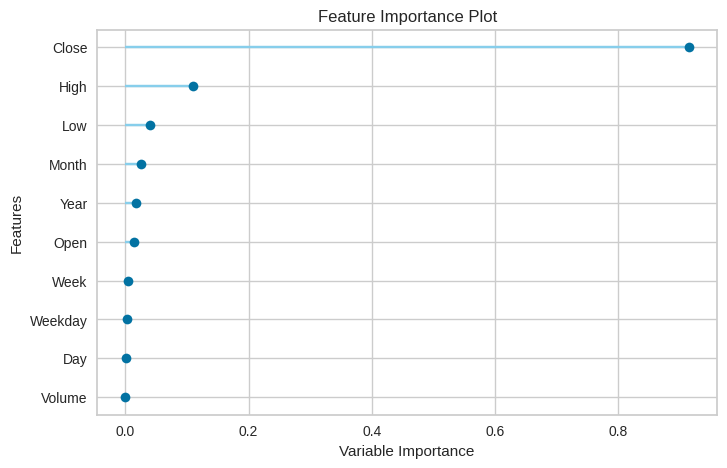

In [27]:
#plot the feature importance
plot_model(finalized_model,plot='feature')

In [35]:
predictions=predict_model(finalized_model,data=test_data)
predictions #compare(NextClose & prediction_label)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.9277,17.2956,4.1588,0.9978,0.0124,0.0083


,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,NextClose,prediction_label
Date,,,,,,,,,,,,
2018-05-25,244.806381,245.445038,244.293640,244.806381,56374800,25,4,21,5,2018,241.990891,244.797172
2018-05-29,243.151291,243.924896,240.857498,241.990891,115908600,29,1,22,5,2018,245.220184,242.137832
2018-05-30,243.322189,245.669952,243.250244,245.220184,69678400,30,2,22,5,2018,243.717880,245.221021
2018-05-31,244.806305,245.112137,243.106201,243.717880,93519900,31,3,22,5,2018,246.110626,243.794721
2018-06-01,245.040192,246.416458,244.968216,246.110626,71258400,1,4,22,6,2018,247.280060,246.039901
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20,567.840027,569.309998,565.169983,568.250000,77503100,20,4,38,9,2024,569.669983,567.868796
2024-09-23,569.340027,570.330017,568.099976,569.669983,44116900,23,0,39,9,2024,571.299988,569.217519
2024-09-24,570.479980,571.359985,567.599976,571.299988,46805700,24,1,39,9,2024,570.039978,570.855318


In [38]:
#evaluate model and show predictions on entire dataset
predictions=predict_model(finalized_model,data=df)
predictions[['Year','Month','Day','NextClose','prediction_label']]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.1387,4.3492,2.0855,0.9997,0.0116,0.0079


,Year,Month,Day,NextClose,prediction_label
Date,,,,,
1993-01-29,1993,1,29,24.783648,24.540722
1993-02-01,1993,2,1,24.836166,24.695021
1993-02-02,1993,2,2,25.098698,24.748505
1993-02-03,1993,2,3,25.203728,25.012105
1993-02-04,1993,2,4,25.186205,25.125026
...,...,...,...,...,...
2024-09-20,2024,9,20,569.669983,567.868796
2024-09-23,2024,9,23,571.299988,569.217519
2024-09-24,2024,9,24,570.039978,570.855318
